# [NIPA 활용과정] 앱 데이터 분석을 통한 평점 예측 실습

Kaggle에서 제공하는 구글 앱 데이터를 바탕으로 앱 평점을 예측해보는 머신러닝 실습을 수행해 보겠습니다.

데이터 출처: https://www.kaggle.com/gauthamp10/google-playstore-apps

이번 실습은 다음과 같은 과정으로 진행합니다.

1. **데이터 읽기:** 구글 앱 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악

4. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

5. **머신러닝 모델 수행:** 회귀 모델을 사용하여 학습 수행, 평가 및 예측 수행

> 이번 실습에서의 **최소한의 학습 목표**는 **데이터를 바탕으로 머신러닝의 결과물을 수행하는 전체적인 과정을 이해**하기입니다.
더욱 확실하게 목표를 이루기 위해서 학생들에게 기존 데이터에서 랜덤하게 뽑은 테스트 데이터를 바탕으로 배웠던 과정을 수행하여 결과물을 제출하게 합니다. 따라서 모든 학생이 위 목표를 달성 할 수 있는 방향으로 지도 부탁드립니다.

> 최소한의 학습 목표를 만족할 수 있는 학생이라면 **성능 지표를 높일 수 있는 방법을 찾는 것**이 **두 번째 목표**가 될 것입니다. 성능 지표를 높일 방법으로 본 실습에서는 크게 2가지 방식이 있습니다. 

> 1. **EDA 과정에서의 데이터 정제 및 특성 엔지니어링을 통한 성능 향상 방식**: EDA 과정은 데이터를 이해하는데 있어서 매우 중요한 과정이라 생각합니다. 사실 디테일하게 다루려면 온종일 할 수 있는 분량의 콘텐츠를 제작할 수 있지만, 본 실습을 수행하는데 많은 시간이 주어지지 않는다는 한계가 있기에 최소한의 EDA 과정만 다루게 됩니다. 따라서 변수마다 추가적인 이상치 처리 및 특성 엔지니어링을 통하여 성능을 높일 방법은 다양하게 있다 생각하며, 이 부분은 강의자께서도 여러 가지로 시도해보시면서 학생들에게 인사이트를 주면 좋을 거 같습니다.

> 2. **머신러닝 모델을 통한 성능 향상 방식**: EDA를 통한 데이터에 대한 이해 이후로 머신러닝 특징에 맞추어 모델을 선택하고 다양한 튜닝 방법을 통하여 성능을 높일 수 있습니다. 하지만 본 과정을 수강하는 학생들은 머신러닝 모델별로의 심도 있는 이해는 못 하는 단계라고 생각하기에 이 방식을 통한 성능 향상은 구현하기는 쉽지 않아 보입니다. 

In [1]:
!pip install --upgrade pip
!pip install -U pandas
!pip install -U numpy
!pip install -U scipy
!pip install -U scikit-learn
!pip install xgboost
!pip install lightgbm

Requirement already up-to-date: pip in c:\users\eunju\anaconda3\lib\site-packages (20.2.4)
Requirement already up-to-date: pandas in c:\users\eunju\anaconda3\lib\site-packages (1.1.4)
Requirement already up-to-date: numpy in c:\users\eunju\anaconda3\lib\site-packages (1.19.4)
Requirement already up-to-date: scipy in c:\users\eunju\anaconda3\lib\site-packages (1.5.4)
Requirement already up-to-date: scikit-learn in c:\users\eunju\anaconda3\lib\site-packages (0.23.2)


## 1. 데이터 읽기

> 이 파트에서는 **데이터를 읽는 방법을 익히고 어떠한 변수가 있는지 확인하는 방법**을 수행하는 것을 목표로 합니다. head, info 등의 함수에 대해서 설명해주시고 강의자분이 또 다른 방법들을 추가하여 설명하셔도 될 거 같습니다.

pandas를 사용하여 `Google-Playstore.csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\eunju\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.1 디렉토리 체크

작업을 하기 전에 현재 디렉토리가 어떻게 설정되어있는지 확인해줍니다.

current_path = os.chdir("/content/drive/MyDrive/Colab Notebooks/강의자료")
print(os.listdir(current_path))
print(os.getcwd()) #=> get current working directory

### 1.2 Google-Playstore.csv 데이터 불러오기

In [2]:
# Google-Playstore.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
df_origin = pd.read_csv('Google-Playstore.csv')

In [64]:
df_origin.corr()["Rating"]

#위의 상관관계에서 Free,Ad Supported,In App Purchases,Editors Choice가 주요 변수라 생각되어 해당 변수는 남기기로 했다.

Rating              1.000000
Rating Count        0.016980
Minimum Installs    0.012640
Maximum Installs    0.014608
Free                0.029064
Price              -0.014955
Ad Supported        0.153105
In App Purchases    0.164163
Editors Choice      0.025952
Name: Rating, dtype: float64

In [65]:
# drop 함수를 사용하여 변수들을 삭제합니다.
df_clean= df_origin.drop(columns=[
    'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 
    'Privacy Policy', 'Minimum Installs', 'Maximum Installs',
    'Minimum Android','Currency'
], axis=1)
df_clean.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,"10,000,000+",True,0.00,21M,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,False,False,False
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,"100,000,000+",True,0.00,Varies with device,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,True,False,False
2,Safeway Delivery & Pick Up,Shopping,4.2,5532.0,"500,000+",True,0.00,12M,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,False,False,False
3,My CookBook Ad-Free,Food & Drink,4.7,2531.0,"10,000+",False,5.99,Varies with device,"Sep 25, 2011",2020-07-07 12:41:28,Everyone,False,False,False
4,Talabat: Food & Grocery Delivery,Food & Drink,4.4,197649.0,"5,000,000+",True,0.00,Varies with device,"Jan 19, 2012",2020-07-15 19:21:16,Mature 17+,True,False,False


In [59]:
df_clean.isnull().sum()

App Name                1
Category                0
Rating               3760
Rating Count         3760
Installs              172
Free                    0
Price                   0
Size                    0
Released            32278
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [60]:
# dropna를 사용하여 결측값이 있는 샘플들을 삭제합니다.
df_clean = df_clean.dropna()

In [61]:
# 결측값을 정보를 출력합니다.
df_clean.isnull().sum() #=>개수확인

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Free                0
Price               0
Size                0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [62]:
# 'Rating Count' 값이 10보다 큰 경우 부터 의미 있는 데이터로 생각하고 10보다 작은 데이터는 삭제합니다.
df_clean = df_clean[df_clean['Rating Count'] > 30]

In [63]:
#Install 변수 정제
for element in set(df_clean['Installs']):
    df_clean = df_clean.replace(element,int(element.split('+')[0].replace(',', '')))

In [22]:
# 위 분포에서 양쪽 끝의 데이터들이 너무 작기에 이를 추가로 삭제합니다.
# 500000개 초과는 1000000으로 변환
df_clean.loc[df_clean['Installs']>500000,'Installs'] = 1000000
df_clean[df_clean['Installs']>500000]

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,1000000,True,0.0,21M,2020-07-07 00:14:05,Everyone,False,False,False
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,1000000,True,0.0,Varies with device,2020-07-02 20:10:48,Everyone,True,False,False
4,Talabat: Food & Grocery Delivery,Food & Drink,4.4,197649.0,1000000,True,0.0,Varies with device,2020-07-15 19:21:16,Mature 17+,True,False,False
5,DoorDash - Food Delivery,Food & Drink,4.5,784802.0,1000000,True,0.0,38M,2020-06-26 01:32:02,Everyone,False,False,False
7,"Yelp: Find Food, Delivery & Services Nearby",Food & Drink,4.1,453646.0,1000000,True,0.0,Varies with device,2020-07-21 05:01:40,Teen,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602276,Ghost House Escape,Adventure,3.9,19759.0,1000000,True,0.0,72M,2019-09-02 00:40:57,Everyone,True,True,False
602278,Zombie Invasion : Escape,Action,3.9,18371.0,1000000,True,0.0,22M,2016-08-30 19:42:49,Teen,True,True,False
602281,Prison Break: The Great Escape,Action,3.9,13909.0,1000000,True,0.0,81M,2019-11-07 20:21:28,Teen,True,True,False
602282,Prison Break: Lockdown (Free),Action,4.1,194358.0,1000000,True,0.0,44M,2019-09-15 21:35:34,Teen,True,True,False


In [23]:
# 5000개 미만은 1000으로 변환
df_clean.loc[df_clean['Installs']<5000,'Installs'] = 1000
df_clean[df_clean['Installs']<5000]

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
46,Martha Stewart TV,Lifestyle,4.1,28.0,1000,True,0.0,29M,2020-07-15 01:44:32,Everyone,False,True,False
64,Money Manager - Track your expenses,Finance,4.4,163.0,1000,True,0.0,5.0M,2020-06-02 14:32:02,Everyone,True,True,False
67,PeaceMe - Meditate & Sleep,Health & Fitness,4.7,39.0,1000,True,0.0,37M,2020-05-20 15:52:42,Everyone,False,True,False
68,GreenChoice: Healthy Grocery Shopping,Food & Drink,4.7,19.0,1000,True,0.0,30M,2020-07-22 01:55:13,Everyone,False,False,False
85,FIKASO - Livraison de Repas et de Courses,Food & Drink,4.4,15.0,1000,True,0.0,21M,2019-09-23 09:56:34,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602909,Camping Capo Ferrato,Travel & Local,5.0,11.0,1000,True,0.0,28M,2019-07-17 20:10:50,Everyone,False,False,False
602933,Ultimate Rock Ballads,Entertainment,4.9,28.0,1000,True,0.0,3.5M,2020-04-03 13:22:44,Teen,True,False,False
602941,8 Ball,Sports,4.1,28.0,1000,True,0.0,16M,2020-02-16 11:36:47,Everyone,True,False,False
602943,Billiards:8 Ball 2-Pocket,Sports,4.3,22.0,1000,True,0.0,21M,2020-02-16 09:41:00,Everyone,True,False,False


1000        80081
5000        45549
10000      107995
50000       37534
100000      58985
500000      15335
1000000     30149
Name: Installs, dtype: int64

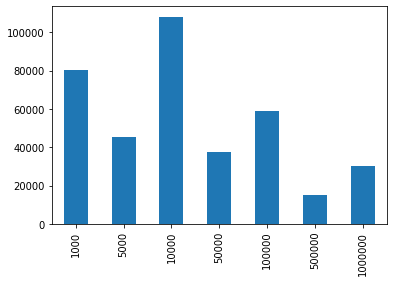

In [24]:
# 다시 분포를 출력합니다.
df_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')
df_clean['Installs'].value_counts().sort_index(ascending=True)

### 3.3. `Free` 시각화

True     358629
False     16999
Name: Free, dtype: int64

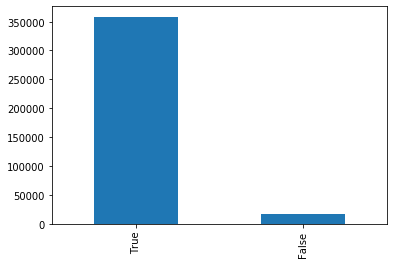

In [25]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Free'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Free'].value_counts()

### 3.4. `Last Updated` 시각화

In [26]:
# 분포를 도수분포표로 확인합니다.
df_clean['Last Updated'].value_counts()

2020-07-13 07:39:47    4
2020-07-13 07:38:25    4
2020-07-08 14:07:44    4
2020-04-15 19:45:13    4
2020-07-13 07:38:00    4
                      ..
2020-06-07 21:43:34    1
2020-04-07 17:04:09    1
2018-01-09 21:07:34    1
2020-06-17 19:54:46    1
2019-12-05 02:21:56    1
Name: Last Updated, Length: 373778, dtype: int64

In [27]:
# 날짜와 시간 정보인 Last Updated를 가공하여 새로운 정보를 갖는 데이터를 만들어 저장해봅시다.
# 간단하게 올해 업데이트가 되었는지 안되었는지를 알 수 있는 'Last update since 2020' 변수를 만들어 추가해봅시다.

# 1. df_clean['Last Updated']
# 2. for d in df_clean['Last Updated']:
#       print(d)

#3. for d in df_clean['Last Updated']:
#       print(d.split("-")[0])

#4. [d.split('-')[0] == '2020' for d in df_clean['Last Updated']]
df_clean['Last update since 2020'] = [d.split('-')[0] == '2020' for d in df_clean['Last Updated']]

False    204568
True     171060
Name: Last update since 2020, dtype: int64

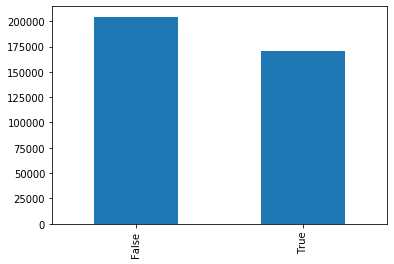

In [28]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Last update since 2020'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Last update since 2020'].value_counts()

### 3.5. `Content Rating` 시각화 

Everyone           328910
Teen                30289
Everyone 10+         8209
Mature 17+           8184
Unrated                19
Adults only 18+        17
Name: Content Rating, dtype: int64

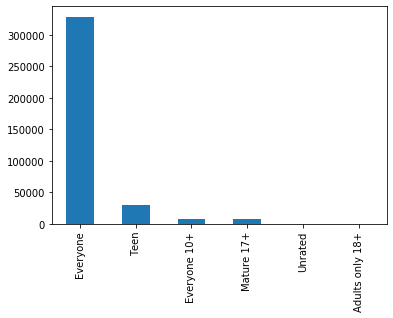

In [29]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Content Rating'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Content Rating'].value_counts()

### 3.6. `Ad Supported` 시각화 

True     223456
False    152172
Name: Ad Supported, dtype: int64

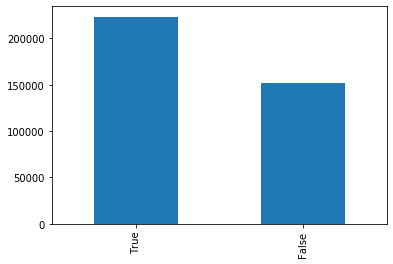

In [30]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Ad Supported'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Ad Supported'].value_counts()

### 3.7. `In App Purchases` 시각화 

False    305963
True      69665
Name: In App Purchases, dtype: int64

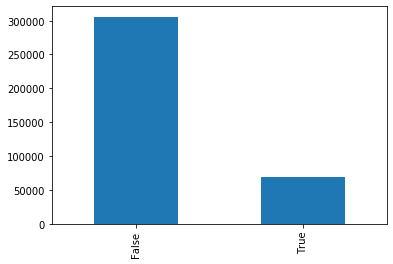

In [31]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['In App Purchases'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['In App Purchases'].value_counts()

### 3.8. `Editors Choice` 시각화 

False    374783
True        845
Name: Editors Choice, dtype: int64

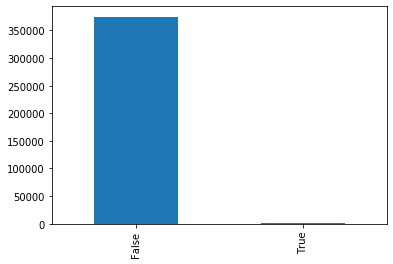

In [32]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Editors Choice'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Editors Choice'].value_counts()

## 4. 데이터 전처리

> 머신러닝 모델을 사용하기 위해서 데이터를 준비하는 파트입니다. 본 실습에서는 특성 엔지니어링 기법 중 더미(dummy) 방식과 학습&테스트 데이터를 분리 하는 과정을 다룹니다. 

> 본 실습에서의 더미에서는 어떠한 데이터를 머신러닝의 feature로 사용할 것인가를 결정하는 중요한 파트라 생각합니다. 0,1만을 사용하는 더미 방식 외에 object 자료형을 변환하는 다양한 기법들이 있고 이를 어떻게 적용하느냐에 따라 성능에 큰 영향을 줄 수 있다는 지도가 있었으면 합니다.

> 학습, 테스트 분리에서는 왜 데이터를 분리에서 사용하는지에 대한 설명이 해주시면 좋을 거 같습니다.


> 추가로 데이터 정규화를 수행하는데 StandardScaler 이외의 minmax 정규화 등의 다양한 기법들을 소개해주시고 왜 정규화가 필요한지를 지도하면 좋을 거 같습니다.

앱 평점 예측을 수행하기 위해서 주어진 구글 앱 데이터에 대해서 회귀 모델을 사용할 것입니다.

이번 파트에서는 11개의 변수만을 사용하여 예측을 수행하지만, 나머지 12개의 변수들을 추가하여 입력 데이터를 확장할 수 있습니다.

회귀 모델의 필요한 입력 데이터를 준비 하기위해서 다음과 같은 전처리를 수행하겠습니다.

1. Object 자료형 -> 숫자 자료형 변환하기
2. 학습 데이터와 테스트 데이터로 나누기

### 4.1. 더미변수(Dummy Variable)를 활용하여 Object 자료형을 수치형으로 변환

---



일반적인 머신러닝 모델에서는 수치 자료형만을 입력값으로 사용합니다. 따라서 수치 자료형만을 사용하여 입력값으로 사용할 수 있지만, 신용 예측을 위한 데이터에 존재하는 `Content Rating` 변수의 데이터들은 중요한 정보일 수 잇는 object 자료형을 사용할 수가 없습니다.

그렇기에 이러한 object 자료형을 수치 자료형으로 변환하는 dummy 방식을 사용하여 다양한 데이터를 수치형 입력으로 사용해 봅시다.

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375628 entries, 0 to 603006
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App Name                375628 non-null  object 
 1   Category                375628 non-null  object 
 2   Rating                  375628 non-null  float64
 3   Rating Count            375628 non-null  float64
 4   Installs                375628 non-null  int64  
 5   Free                    375628 non-null  bool   
 6   Price                   375628 non-null  float64
 7   Size                    375628 non-null  object 
 8   Last Updated            375628 non-null  object 
 9   Content Rating          375628 non-null  object 
 10  Ad Supported            375628 non-null  bool   
 11  In App Purchases        375628 non-null  bool   
 12  Editors Choice          375628 non-null  bool   
 13  Last update since 2020  375628 non-null  bool   
dtypes: bool(5), float64(

In [34]:
df_clean.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Last update since 2020
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,1000000,True,0.00,21M,2020-07-07 00:14:05,Everyone,False,False,False,True
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,1000000,True,0.00,Varies with device,2020-07-02 20:10:48,Everyone,True,False,False,True
2,Safeway Delivery & Pick Up,Shopping,4.2,5532.0,500000,True,0.00,12M,2020-07-16 23:21:50,Everyone,False,False,False,True
3,My CookBook Ad-Free,Food & Drink,4.7,2531.0,10000,False,5.99,Varies with device,2020-07-07 12:41:28,Everyone,False,False,False,True
4,Talabat: Food & Grocery Delivery,Food & Drink,4.4,197649.0,1000000,True,0.00,Varies with device,2020-07-15 19:21:16,Mature 17+,True,False,False,True


In [35]:
# 2개의 카테고리를 갖는 데이터는 replace를 사용하여 0,1로 변환 합니다.
df_clean = df_clean.replace([True,False],[1,0])

# object 자료형 데이터의 변수를 정리합니다.
chr_features = ['Category']

# 수치 자료형 데이터의 변수를 정리합니다.
num_features=['Rating Count', 'Installs', 'Free', 'Price', 'Last update since 2020', 'Ad Supported','In App Purchases', 'Editors Choice']

# 더미를 기법을 사용하여 변환합니다.
for variable in chr_features:
    
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
    dummies = pd.get_dummies(df_clean[chr_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
    df_dummy= pd.concat([df_clean[num_features], dummies],axis=1)

In [36]:
df_dummy.columns

Index(['Rating Count', 'Installs', 'Free', 'Price', 'Last update since 2020',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Category_Action',
       'Category_Adventure', 'Category_Arcade', 'Category_Art & Design',
       'Category_Auto & Vehicles', 'Category_Beauty', 'Category_Board',
       'Category_Books & Reference', 'Category_Business', 'Category_Card',
       'Category_Casino', 'Category_Casual', 'Category_Comics',
       'Category_Communication', 'Category_Dating', 'Category_Education',
       'Category_Educational', 'Category_Entertainment', 'Category_Events',
       'Category_Finance', 'Category_Food & Drink',
       'Category_Health & Fitness', 'Category_House & Home',
       'Category_Libraries & Demo', 'Category_Lifestyle',
       'Category_Maps & Navigation', 'Category_Medical', 'Category_Music',
       'Category_Music & Audio', 'Category_News & Magazines',
       'Category_Parenting', 'Category_Personalization',
       'Category_Photography', 'Category_Pr

In [37]:
# 더미로 구한 데이터를 numpy 형태로 머신러닝 입력값인 x에 저장합니다.
x = df_dummy.to_numpy()
print(np.shape(x))

(375628, 56)


In [38]:
# 예측해야 할 변수 `Rating`만을 선택하여 numpy 형태로 y에 저장합니다.
y = df_clean['Rating']
#dimension check
print(np.shape(y.to_numpy()))
y = y.to_numpy()
#y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용 => 이미 1차원이므로 딱히 필요 없음


(375628,)


### 4.2. 학습, 테스트 데이터 분리

---



머신러닝의 성능을 평가 하기 위해서는 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터를 나누어 사용합니다.

<Train set과 Test set을 나누는 이유> 

우리는 새로운 데이터에 이 모델이 얼마나 잘 들어맞는지 알고 싶습니다. 그런데 가지고 있는 데이터를 모두 모델 만드는데 써버리면, 그 모델이 새로운 데이터에 얼마나 잘 들어맞는지 모르게 됩니다. 그래서 보유한 데이터에서 test set을 따로 떼어놓고 training set으로만 모델을 만든 다음, test set으로 새로운 데이터에 얼마나 잘 들어맞는지 확인합니다

In [39]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손 쉽게 분리 할 수 있습니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

### 4.3. 데이터 정규화

정규화 이유
1. 정규화하지 않으면 스케일이 큰 변수가 영향을 크게 받아 다른 변수를 잡아먹는다 

2. 단위가 모두 다르기 때문에 모든 변수를 같은 스케일로 맞춤

a. min-max

b. standardization → 표준정규분포로 만들기 


각 변수 마다의 스케일 차이를 맞추기 위하여 정규화를 수행합니다.

In [40]:
from sklearn.preprocessing import StandardScaler #사이킷런

# 정규화를 위해서 StandardScaler 불러오기
sc = StandardScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 5. 머신러닝 모델 수행

> 머신러닝 모델의 경우에는 단순 선형 회귀, 다항 회귀, 트리모델 간의 장단점을 위주로 설명해주셨으면 좋겠습니다. 각 모델의 원리와 파라미터와 특징에 대해서 설명하게 되면 너무나 많은 힘이 들기에 간단하게 sklearn에서의 사용법과 평가 방식에 힘을 들여 설명해주시면 좋을 거 같습니다.

> 평가 방식으로는 RMSE와 R2를 사용하기에 이에 대한 설명을 꼭 해주셨으면 좋겠습니다.

> 평가방법: 
> RMSE(Root Mean Square Error, 평균 제곱근 오차)

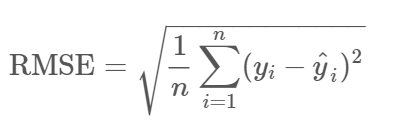

전처리된 데이터를 바탕으로 회귀 모델을 학습을 수행하고 학습 결과를 출력 해봅니다.

먼저 기본적인 회귀 모델인 **단순 선형 회귀(Simple linear regression)**를 사용하여 학습을 수행하고, 다양한 모델들을 살펴봅시다.

### 5.1. 단순 선형 회귀

회귀(Regression) 라는 개념은 

#### 5.1.1. 학습

In [41]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 class를 불러옵니다.
model = LinearRegression()

# fit 함수를 사용하여 학습을 수행합니다.
model.fit(x_train, y_train)

LinearRegression()

#### 5.1.2. 평가

회귀분석에서는 결정계수(R^2)라는 평가 방법도 추가로 활용합니다.
결정계수란, 해당 모델이 데이터를 얼마나 잘 설명하는지를 나타냅니다.


In [42]:
from sklearn.metrics import r2_score, mean_squared_error

# 학습 데이터의 예측값을 저장합니다.
pred_train = model.predict(x_train)

# 학습 데이터의 성능을 저장합니다.
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

# 테스트 데이터의 예측값을 저장합니다.
pred_test = model.predict(x_test)

# 테스트 데이터의 성능을 저장합니다.
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 성능을 출력합니다.
print('train data RMSE: ', np.sqrt(mse_train))
print('train data R2: ', r2_train)

print('test data RMSE: ', np.sqrt(mse_test))
print('test data R2: ', r2_test)

train data RMSE:  0.5625153943952628
train data R2:  0.0797228948608747
test data RMSE:  0.5601028791411116
test data R2:  0.07895891564988122


#### 5.1.3. 예측

In [43]:
# 0번부터 9번까지 10개를 출력해 보겠습니다.
for i in range(10): 
    
    #1.prediction = model.predict(x_test[i]) => 에러
    #2.prediction = model.predict(x_test[i].reshape(1,-1))
    #3.print(predition)
    #4.print(prediction[0])

    prediction = model.predict(x_test[i].reshape(1,-1))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 4.258923775855514, 실제 데이터: 4.3
1 번째 테스트 데이터의 예측 결과: 3.948350197974655, 실제 데이터: 4.2
2 번째 테스트 데이터의 예측 결과: 3.8479931423105924, 실제 데이터: 3.9
3 번째 테스트 데이터의 예측 결과: 4.332055337134811, 실제 데이터: 4.3
4 번째 테스트 데이터의 예측 결과: 4.061150796119186, 실제 데이터: 3.7
5 번째 테스트 데이터의 예측 결과: 4.333752877418014, 실제 데이터: 4.4
6 번째 테스트 데이터의 예측 결과: 4.151162392798874, 실제 데이터: 4.5
7 번째 테스트 데이터의 예측 결과: 4.173306710425827, 실제 데이터: 4.0
8 번째 테스트 데이터의 예측 결과: 3.899205453101608, 실제 데이터: 4.8
9 번째 테스트 데이터의 예측 결과: 4.038579232398483, 실제 데이터: 4.4


### 5.2. 다항 회귀 모델

#### 5.2.1. 학습

In [44]:
from sklearn.preprocessing import PolynomialFeatures

# 우리가 위에서 사용한 모델은 선형회귀 => 직선
# 다항 회귀 모델을 사용하기 위해서는 PolynomialFeatures를 사용하여 고차항 변수를 생성합니다.
# interaction_only=True 를 사용하면 변수 간의 곱을 고려하지 않기에 모델이 간소화 됩니다.
# interaction_only=False 사용 시 모델은 복잡해지고 학습 시간이 매우 증가합니다. => 계량적(?)으로 고려해야한다. interaction Term
poly = PolynomialFeatures(degree=3, interaction_only=True) #데이터가 3차원식으로 생겼을 때 이렇게 쓰면 선형보다 잘 나올 것임

# x_train 데이터를 다항 회귀에 필요한 입력값으로 변환합니다.
x_train_poly = poly.fit_transform(x_train)
x_train_poly

MemoryError: Unable to allocate 57.4 GiB for an array with shape (262939, 29317) and data type float64

In [45]:
# 선형 회귀 모델을 선언합니다.
# 선형 회귀 모델이지만 다항 회귀도 수행할 수 있습니다.
# n_jobs=-1을 설정하여 모든 프로세서를 사용하여 학습의 속도를 높입니다. #멀티코어 #default = 싱글코어
model_poly = LinearRegression(n_jobs=-1)

# 학습을 수행합니다.
model_poly = model_poly.fit(x_train_poly, y_train)

NameError: name 'x_train_poly' is not defined

#### 5.2.2. 평가

In [46]:
# 테스트 데이터를 변환합니다.
x_test_poly = poly.fit_transform(x_test)

# 학습 데이터의 예측값을 저장합니다.
pred_train = model_poly.predict(x_train_poly)

# 학습 데이터의 성능을 저장합니다.
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# 테스트 데이터의 예측값을 저장합니다.
pred_test = model_poly.predict(x_test_poly)

# 테스트 데이터의 성능을 저장합니다.
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, pred_test)

# 성능을 출력합니다.
print('train data RMSE: ', rmse_train)
print('train data R2: ', r2_train)

print('test data RMSE: ', rmse_test)
print('test data R2: ', r2_test)

KeyboardInterrupt: 

#### 5.2.3. 예측

In [ ]:
# 0번부터 9번까지 10개를 출력해 보겠습니다.
for i in range(10): 
    
    prediction = model_poly.predict(x_test_poly[i].reshape(1,-1))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

### 5.3. 의사결정나무 & 랜덤포레스트 & 앙상블기법들

In [ ]:
!pip install xgboost
!pip install lightgbm

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

models = []
models.append(('CART', DecisionTreeRegressor())) # 의사결정나무 모델 #CART는 의사결정나무 중 알고리즘 이름
models.append(('RandomForest', RandomForestRegressor(n_jobs=-1))) # 랜덤포레스트 모델
models.append(('XGB', XGBRegressor(n_jobs=-1))) 
models.append(('lightGBM', LGBMRegressor(n_jobs=-1)))

for name, model in models:
    model.fit(x_train, y_train)
    model.predict(x_train)

    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)

    r2_train = r2_score(y_train, model.predict(x_train))
    r2_test = r2_score(y_test, model.predict(x_test))

    result_1 = "%s - train_RMSE_score : %f, test_RMSE_score : %f" % (name, mse_train, mse_test)
    result_2 = "%s - train_R2_score : %f, test_R2_score : %f" % (name, r2_train , r2_test) 
    print(result_1)
    print(result_2)
    print("="*80)

CART - train_RMSE_score : 0.126606, test_RMSE_score : 0.452431
CART - train_R2_score : 0.631783, test_R2_score : -0.328299
RandomForest - train_RMSE_score : 0.148630, test_RMSE_score : 0.345117
RandomForest - train_R2_score : 0.567729, test_R2_score : -0.013233
XGB - train_RMSE_score : 0.277735, test_RMSE_score : 0.284775
XGB - train_R2_score : 0.192245, test_R2_score : 0.163925
lightGBM - train_RMSE_score : 0.284679, test_RMSE_score : 0.284936
lightGBM - train_R2_score : 0.172048, test_R2_score : 0.163453


In [48]:
# 각 모델마다 0번부터 9번까지 10개의 예측 결과를 출력해 보겠습니다.

for i in range(len(models)):
    print("{} 모델".format(models[i][0]))
    for j in range(10): 
    
        prediction = models[i][1].predict(x_test[j].reshape(1,-1))
        print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(j, prediction[0], y_test[j]))
    print("="*80)

CART 모델
0 번째 테스트 데이터의 예측 결과: 4.3, 실제 데이터: 4.3
1 번째 테스트 데이터의 예측 결과: 3.533333333333333, 실제 데이터: 4.2
2 번째 테스트 데이터의 예측 결과: 3.0599999999999996, 실제 데이터: 3.9
3 번째 테스트 데이터의 예측 결과: 4.475, 실제 데이터: 4.3
4 번째 테스트 데이터의 예측 결과: 3.7, 실제 데이터: 3.7
5 번째 테스트 데이터의 예측 결과: 4.423188405797102, 실제 데이터: 4.4
6 번째 테스트 데이터의 예측 결과: 4.3, 실제 데이터: 4.5
7 번째 테스트 데이터의 예측 결과: 3.6, 실제 데이터: 4.0
8 번째 테스트 데이터의 예측 결과: 4.5, 실제 데이터: 4.8
9 번째 테스트 데이터의 예측 결과: 4.5, 실제 데이터: 4.4
RandomForest 모델
0 번째 테스트 데이터의 예측 결과: 4.11775, 실제 데이터: 4.3
1 번째 테스트 데이터의 예측 결과: 3.510838095238097, 실제 데이터: 4.2
2 번째 테스트 데이터의 예측 결과: 3.6368119047619034, 실제 데이터: 3.9
3 번째 테스트 데이터의 예측 결과: 4.488091666666668, 실제 데이터: 4.3
4 번째 테스트 데이터의 예측 결과: 4.121999999999996, 실제 데이터: 3.7
5 번째 테스트 데이터의 예측 결과: 4.42106002915932, 실제 데이터: 4.4
6 번째 테스트 데이터의 예측 결과: 4.0643, 실제 데이터: 4.5
7 번째 테스트 데이터의 예측 결과: 3.9530523809523817, 실제 데이터: 4.0
8 번째 테스트 데이터의 예측 결과: 4.522000000000002, 실제 데이터: 4.8
9 번째 테스트 데이터의 예측 결과: 4.096999999999998, 실제 데이터: 4.4
XGB 모델
0 번째 테스트 데이터의 예측 결과: 4.207320213317871, 실제 데

## 위 과정의 결과 Xgb & lightGBM의 모델이 가장 결과가 좋게 나와서 해당 모델을 적용하였습니다.

In [49]:
df_origin2 = pd.read_csv('webapp_test_feature.csv')

In [50]:
df_origin2.head()

,App Name,App Id,Category,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,Earth & Moon in HD Gyro 3D Parallax Live Wallp...,com.afkettler.earth,Personalization,73806.0,"5,000,000+",5000000.0,7209120,True,0.0,USD,...,CodeKonditor,https://www.facebook.com/codekonditor,mail@codekonditor.com,"Nov 10, 2013",2020-03-21 18:49:16,Everyone,http://www.codekonditor.com/privacy/,False,False,False
1,TakeLessons Live,com.takelessons.tma_android,Education,227.0,"10,000+",10000.0,36956,True,0.0,USD,...,TakeLessons,https://www.takelessons.com,info@takelessons.com,"Oct 5, 2016",2020-07-10 20:59:19,Everyone,https://takelessons.com/privacy,False,False,False
2,Taxi Driving Simulation Be Quick in the City,com.ozGames.taxiDrivingSimulatorDriftPro,Simulation,33.0,"1,000+",1000.0,1251,True,0.0,USD,...,ayris soft,https://ayrissoft.github.io/,hakansatilmis@gmail.com,"Apr 30, 2020",2020-05-01 16:59:24,Teen,https://justpaste.it/27fzs,True,False,False
3,دیکشنری انگلیسی به فارسی آلفا,ir.alphasoft.dictionary,Education,34.0,"1,000+",1000.0,1163,True,0.0,USD,...,Digi.Soft,http://digivpn.xyz,digi.vpn.com@gmail.com,"Mar 10, 2019",2019-03-11 13:58:28,Everyone,http://www.movinapp.com/apps-privacy-policy/,True,False,False
4,Biblia de Jerusalén / Biblia Católica,com.appslitedesarrolladores.bibliadejerusalen,Books & Reference,98.0,"10,000+",10000.0,41051,True,0.0,USD,...,Apps Free Lite,https://appsfreelite.blogspot.com/,appsfreelite@gmail.com,"Oct 22, 2018",2020-04-09 10:35:46,Teen,https://docs.google.com/document/d/e/2PACX-1vQ...,True,False,False


In [51]:
df_origin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46922 entries, 0 to 46921
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           46922 non-null  object 
 1   App Id             46922 non-null  object 
 2   Category           46922 non-null  object 
 3   Rating Count       46922 non-null  float64
 4   Installs           46922 non-null  object 
 5   Minimum Installs   46922 non-null  float64
 6   Maximum Installs   46922 non-null  int64  
 7   Free               46922 non-null  bool   
 8   Price              46922 non-null  float64
 9   Currency           46922 non-null  object 
 10  Size               46922 non-null  object 
 11  Minimum Android    46922 non-null  object 
 12  Developer Id       46922 non-null  object 
 13  Developer Website  46922 non-null  object 
 14  Developer Email    46922 non-null  object 
 15  Released           46922 non-null  object 
 16  Last Updated       469

In [52]:
#trn 정제 과정
def cleansing(df):
    df_clean = df.drop(columns=[
    'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 
    'Privacy Policy', 'Released', 'Minimum Installs', 'Maximum Installs',
    'Minimum Android','Currency'], axis=1)
    for element in set(df_clean['Installs']):
    # (1) element.split('+')
    # (2) element.split('+')[0]
    # (3) element.split('+')[0].replace(',', '')
    # (4) int(element.split('+')[0].replace(',', '')))
    # (5) 
        df_clean = df_clean.replace(element,int(element.split('+')[0].replace(',', '')))
    # 위 분포에서 양쪽 끝의 데이터들이 너무 작기에 이를 추가로 삭제합니다.
    # 500000개 초과는 1000000으로 변환
    df_clean.loc[df_clean['Installs']>500000,'Installs'] = 1000000
    df_clean[df_clean['Installs']>500000]
    # 5000개 미만은 1000으로 변환
    df_clean.loc[df_clean['Installs']<5000,'Installs'] = 1000
    df_clean[df_clean['Installs']<5000]
    df_clean['Last update since 2020'] = [d.split('-')[0] == '2020' for d in df_clean['Last Updated']]
    df_clean = df_clean.replace([True,False],[1,0])

# object 자료형 데이터의 변수를 정리합니다.
    chr_features = ['Content Rating', 'Category']

# 수치 자료형 데이터의 변수를 정리합니다.
    num_features=['Rating Count', 'Installs', 'Free','Last update since 2020', 'Ad Supported','In App Purchases', 'Editors Choice', 'Price']

# 더미를 기법을 사용하여 변환합니다.
    for variable in chr_features:
    
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
        dummies = pd.get_dummies(df_clean[chr_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
        df_dummy= pd.concat([df_clean[num_features], dummies],axis=1)
        x = df_dummy.to_numpy()
    return(x)

In [53]:
# tst 적용
x = cleansing(df_origin2)
print(x)

[[7.3806e+04 1.0000e+06 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.2700e+02 1.0000e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [3.3000e+01 1.0000e+03 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [3.3000e+01 1.0000e+03 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.2000e+01 1.0000e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.9000e+01 5.0000e+03 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

models = []
#models.append(('CART', DecisionTreeRegressor())) # 의사결정나무 모델 #CART는 의사결정나무 중 알고리즘 이름
#models.append(('RandomForest', RandomForestRegressor(n_jobs=-1))) # 랜덤포레스트 모델
models.append(('XGB', XGBRegressor(n_jobs=-1))) 
models.append(('lightGBM', LGBMRegressor(n_jobs=-1)))

for name, model in models:
    model.fit(x_train, y_train)
    model.predict(x_train)

    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)

    r2_train = r2_score(y_train, model.predict(x_train))
    r2_test = r2_score(y_test, model.predict(x_test))

    result_1 = "%s - train_RMSE_score : %f, test_RMSE_score : %f" % (name, mse_train, mse_test)
    result_2 = "%s - train_R2_score : %f, test_R2_score : %f" % (name, r2_train , r2_test) 
    print(result_1)
    print(result_2)
    print("="*80)

XGB - train_RMSE_score : 0.277735, test_RMSE_score : 0.284775
XGB - train_R2_score : 0.192245, test_R2_score : 0.163925
lightGBM - train_RMSE_score : 0.284679, test_RMSE_score : 0.284936
lightGBM - train_R2_score : 0.172048, test_R2_score : 0.163453


In [55]:
for i in range(len(models)):
    print("{} 모델".format(models[i][0]))
    for j in range(10): 
    
        prediction = models[i][1].predict(x[j].reshape(1,-1))
        print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(j, prediction[0], y_test[j]))
    print("="*80)

XGB 모델


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61']
training data did not have the following fields: f56, f59, f60, f61, f58, f57

In [56]:
import pandas as pd
y_pred = model.predict(x)
result = pd.DataFrame(y_pred)
print(result)

ValueError: Number of features of the model must match the input. Model n_features_ is 56 and input n_features is 62 

In [ ]:
result.to_csv("result_조은정_final9.csv")

---